# Demo ConvNet para identificar LETRAS & NÚMEROS (usa modelo ya entrenado para predecir sobre imágnes de carpeta 'Predict')
Se dataset de imágenes obtenido de http://www.ee.surrey.ac.uk/CVSSP/demos/chars74k/

1) Cargar librerías:

In [1]:
# nota se debe indicar la versión 1 de TF para compatibilidad del código
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation

from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from IPython.display import Image

import os
import os.path

import json
from keras.models import model_from_json
from keras.models import load_model

import numpy as np 
import matplotlib.pyplot as plt

print ("Librerías cargadas.")

TensorFlow 1.x selected.
1.15.2
Librerías cargadas.


Using TensorFlow backend.


2) Monta el Drive para poder acceder a los archivos:

In [2]:
# monta Google Drive:
# Nota: la primera vez se debe confirmar el uso logueandose en "Google Drive File Stream" y obteniendo código de autentificación.
from google.colab import drive
drive.mount('/content/gdrive')

# directorio local en Google Drive
path = 'gdrive/My Drive/IA/demoConvNet-Letras'

# define los nombres de los archivos a utilizar para leer/grabar el modelo
history_file_name = path + '/Model/CNN_L_history_dump_final.json'
weights_file_name = path + '/Model/CNN_L_model_final.h5'
model_json_file_name = path + '/Model/CNN_L_model_final.json'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


3) Carga el modelo ya entrenado:

In [3]:
# carga modelo ya grabado de ConvNet
if os.path.isfile(model_json_file_name):
    classifier = load_model(weights_file_name)

    if os.path.isfile(history_file_name):
      h = json.load(open(history_file_name, 'r'))
      print("Modelo cargado: [", weights_file_name, "], [", history_file_name, "] y [", model_json_file_name, "] ")
    else: 
      print("No se encuentra modelo para cargar")
else:   
    print("No se encuentra modelo para cargar")

# muestra el modelo cargado
print(classifier.summary())

# carga la lista de clases si no está definida   
import csv
with open( path + '/Model/clasesLetrasNros.csv', mode='r') as csvfile:
    all_classes = list(csv.reader(csvfile))[0]
print('Definición de las clases: ', all_classes)
##['4', '5', '2', '7', '9', '6', '8', '3', '1', 'B', 'A', '0', 'E', 'F', 'D', 'C', 'G', 'K', 'I', 'J', 'H', 'M', 'N', 'L', 'O', 'Q', 'P', 'R', 'V', 'U', 'Z', 'W', 'X', 'S', 'Y', 'T']


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Modelo cargado: [ gdrive/My Drive/IA/demoConvNet-Letras/Model/CNN_L_model_final.h5 ], [ gdrive/My Drive/IA/demoConvNet-Letras/Model/CNN_L_history_dump_final.json ] y [ gdrive/My Drive/IA/demoConvNet-Letras/Model/CNN_L_model_final.json ] 
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 126, 126, 64)      1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 61, 61, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 30, 64)        0         
_______________________________________________________________

---

4) Usar el modelo para predecir usando las imágenes de la carpeta 'Predict':


>  gdrive/My Drive/IA/demoConvNet-Letras/Predict/img024-00467.png :  N  [1.] 


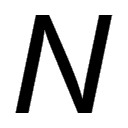

 completo:   4[0.0] 5[0.0] 2[0.0] 7[0.0] 9[0.0] 6[0.0] 8[0.0] 3[0.0] 1[0.0] B[0.0] A[0.0] 0[0.0] E[0.0] F[0.0] D[0.0] C[0.0] G[0.0] K[0.0] I[0.0] J[0.0] H[0.0] M[0.0] N[1.0] L[0.0] O[0.0] Q[0.0] P[0.0] R[0.0] V[0.0] U[0.0] Z[0.0] W[0.0] X[0.0] S[0.0] Y[0.0] T[0.0]



>  gdrive/My Drive/IA/demoConvNet-Letras/Predict/img025-00849.png :  O  [1.] 


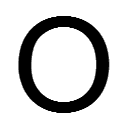

 completo:   4[0.0] 5[0.0] 2[0.0] 7[0.0] 9[0.0] 6[0.0] 8[0.0] 3[0.0] 1[0.0] B[0.0] A[0.0] 0[0.0] E[0.0] F[0.0] D[0.0] C[0.0] G[0.0] K[0.0] I[0.0] J[0.0] H[0.0] M[0.0] N[0.0] L[0.0] O[1.0] Q[0.0] P[0.0] R[0.0] V[0.0] U[0.0] Z[0.0] W[0.0] X[0.0] S[0.0] Y[0.0] T[0.0]



>  gdrive/My Drive/IA/demoConvNet-Letras/Predict/img028-00640.png :  R  [1.] 


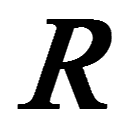

 completo:   4[0.0] 5[0.0] 2[0.0] 7[0.0] 9[0.0] 6[0.0] 8[0.0] 3[0.0] 1[0.0] B[0.0] A[0.0] 0[0.0] E[0.0] F[0.0] D[0.0] C[0.0] G[0.0] K[0.0] I[0.0] J[0.0] H[0.0] M[0.0] N[0.0] L[0.0] O[0.0] Q[0.0] P[0.0] R[1.0] V[0.0] U[0.0] Z[0.0] W[0.0] X[0.0] S[0.0] Y[0.0] T[0.0]



>  gdrive/My Drive/IA/demoConvNet-Letras/Predict/img003-00386.png :  2  [1.] 


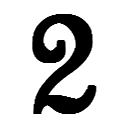

 completo:   4[0.0] 5[0.0] 2[1.0] 7[0.0] 9[0.0] 6[0.0] 8[0.0] 3[0.0] 1[0.0] B[0.0] A[0.0] 0[0.0] E[0.0] F[0.0] D[0.0] C[0.0] G[0.0] K[0.0] I[0.0] J[0.0] H[0.0] M[0.0] N[0.0] L[0.0] O[0.0] Q[0.0] P[0.0] R[0.0] V[0.0] U[0.0] Z[0.0] W[0.0] X[0.0] S[0.0] Y[0.0] T[0.0]



>  gdrive/My Drive/IA/demoConvNet-Letras/Predict/img006-00917.png :  5  [1.] 


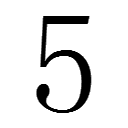

 completo:   4[0.0] 5[1.0] 2[0.0] 7[0.0] 9[0.0] 6[0.0] 8[0.0] 3[0.0] 1[0.0] B[0.0] A[0.0] 0[0.0] E[0.0] F[0.0] D[0.0] C[0.0] G[0.0] K[0.0] I[0.0] J[0.0] H[0.0] M[0.0] N[0.0] L[0.0] O[0.0] Q[0.0] P[0.0] R[0.0] V[0.0] U[0.0] Z[0.0] W[0.0] X[0.0] S[0.0] Y[0.0] T[0.0]



>  gdrive/My Drive/IA/demoConvNet-Letras/Predict/img021-00366.png :  K  [1.] 


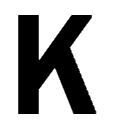

 completo:   4[0.0] 5[0.0] 2[0.0] 7[0.0] 9[0.0] 6[0.0] 8[0.0] 3[0.0] 1[0.0] B[0.0] A[0.0] 0[0.0] E[0.0] F[0.0] D[0.0] C[0.0] G[0.0] K[1.0] I[0.0] J[0.0] H[0.0] M[0.0] N[0.0] L[0.0] O[0.0] Q[0.0] P[0.0] R[0.0] V[0.0] U[0.0] Z[0.0] W[0.0] X[0.0] S[0.0] Y[0.0] T[0.0]



>  gdrive/My Drive/IA/demoConvNet-Letras/Predict/img030-00652.png :  T  [1.] 


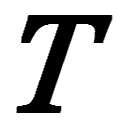

 completo:   4[0.0] 5[0.0] 2[0.0] 7[0.0] 9[0.0] 6[0.0] 8[0.0] 3[0.0] 1[0.0] B[0.0] A[0.0] 0[0.0] E[0.0] F[0.0] D[0.0] C[0.0] G[0.0] K[0.0] I[0.0] J[0.0] H[0.0] M[0.0] N[0.0] L[0.0] O[0.0] Q[0.0] P[0.0] R[0.0] V[0.0] U[0.0] Z[0.0] W[0.0] X[0.0] S[0.0] Y[0.0] T[1.0]



>  gdrive/My Drive/IA/demoConvNet-Letras/Predict/img036-00320.png :  Z  [1.] 


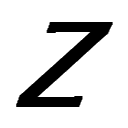

 completo:   4[0.0] 5[0.0] 2[0.0] 7[0.0] 9[0.0] 6[0.0] 8[0.0] 3[0.0] 1[0.0] B[0.0] A[0.0] 0[0.0] E[0.0] F[0.0] D[0.0] C[0.0] G[0.0] K[0.0] I[0.0] J[0.0] H[0.0] M[0.0] N[0.0] L[0.0] O[0.0] Q[0.0] P[0.0] R[0.0] V[0.0] U[0.0] Z[1.0] W[0.0] X[0.0] S[0.0] Y[0.0] T[0.0]



>  gdrive/My Drive/IA/demoConvNet-Letras/Predict/img026-00674.png :  P  [1.] 


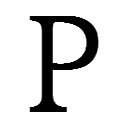

 completo:   4[0.0] 5[0.0] 2[0.0] 7[0.0] 9[0.0] 6[0.0] 8[0.0] 3[0.0] 1[0.0] B[0.0] A[0.0] 0[0.0] E[0.0] F[0.0] D[0.0] C[0.0] G[0.0] K[0.0] I[0.0] J[0.0] H[0.0] M[0.0] N[0.0] L[0.0] O[0.0] Q[0.0] P[1.0] R[0.0] V[0.0] U[0.0] Z[0.0] W[0.0] X[0.0] S[0.0] Y[0.0] T[0.0]



>  gdrive/My Drive/IA/demoConvNet-Letras/Predict/img005-00654.png :  4  [1.] 


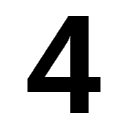

 completo:   4[1.0] 5[0.0] 2[0.0] 7[0.0] 9[0.0] 6[0.0] 8[0.0] 3[0.0] 1[0.0] B[0.0] A[0.0] 0[0.0] E[0.0] F[0.0] D[0.0] C[0.0] G[0.0] K[0.0] I[0.0] J[0.0] H[0.0] M[0.0] N[0.0] L[0.0] O[0.0] Q[0.0] P[0.0] R[0.0] V[0.0] U[0.0] Z[0.0] W[0.0] X[0.0] S[0.0] Y[0.0] T[0.0]



>  gdrive/My Drive/IA/demoConvNet-Letras/Predict/img036-00226.png :  Z  [1.] 


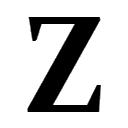

 completo:   4[0.0] 5[0.0] 2[0.0] 7[0.0] 9[0.0] 6[0.0] 8[0.0] 3[0.0] 1[0.0] B[0.0] A[0.0] 0[0.0] E[0.0] F[0.0] D[0.0] C[0.0] G[0.0] K[0.0] I[0.0] J[0.0] H[0.0] M[0.0] N[0.0] L[0.0] O[0.0] Q[0.0] P[0.0] R[0.0] V[0.0] U[0.0] Z[1.0] W[0.0] X[0.0] S[0.0] Y[0.0] T[0.0]



>  gdrive/My Drive/IA/demoConvNet-Letras/Predict/img033-00835.png :  W  [1.] 


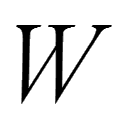

 completo:   4[0.0] 5[0.0] 2[0.0] 7[0.0] 9[0.0] 6[0.0] 8[0.0] 3[0.0] 1[0.0] B[0.0] A[0.0] 0[0.0] E[0.0] F[0.0] D[0.0] C[0.0] G[0.0] K[0.0] I[0.0] J[0.0] H[0.0] M[0.0] N[0.0] L[0.0] O[0.0] Q[0.0] P[0.0] R[0.0] V[0.0] U[0.0] Z[0.0] W[1.0] X[0.0] S[0.0] Y[0.0] T[0.0]



>  gdrive/My Drive/IA/demoConvNet-Letras/Predict/img036-00109.png :  Z  [1.] 


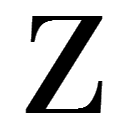

 completo:   4[0.0] 5[0.0] 2[0.0] 7[0.0] 9[0.0] 6[0.0] 8[0.0] 3[0.0] 1[0.0] B[0.0] A[0.0] 0[0.0] E[0.0] F[0.0] D[0.0] C[0.0] G[0.0] K[0.0] I[0.0] J[0.0] H[0.0] M[0.0] N[0.0] L[0.0] O[0.0] Q[0.0] P[0.0] R[0.0] V[0.0] U[0.0] Z[1.0] W[0.0] X[0.0] S[0.0] Y[0.0] T[0.0]



>  gdrive/My Drive/IA/demoConvNet-Letras/Predict/img008-00713.png :  7  [1.] 


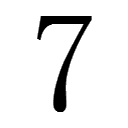

 completo:   4[0.0] 5[0.0] 2[0.0] 7[1.0] 9[0.0] 6[0.0] 8[0.0] 3[0.0] 1[0.0] B[0.0] A[0.0] 0[0.0] E[0.0] F[0.0] D[0.0] C[0.0] G[0.0] K[0.0] I[0.0] J[0.0] H[0.0] M[0.0] N[0.0] L[0.0] O[0.0] Q[0.0] P[0.0] R[0.0] V[0.0] U[0.0] Z[0.0] W[0.0] X[0.0] S[0.0] Y[0.0] T[0.0]



>  gdrive/My Drive/IA/demoConvNet-Letras/Predict/img030-00884.png :  T  [1.] 


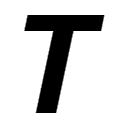

 completo:   4[0.0] 5[0.0] 2[0.0] 7[0.0] 9[0.0] 6[0.0] 8[0.0] 3[0.0] 1[0.0] B[0.0] A[0.0] 0[0.0] E[0.0] F[0.0] D[0.0] C[0.0] G[0.0] K[0.0] I[0.0] J[0.0] H[0.0] M[0.0] N[0.0] L[0.0] O[0.0] Q[0.0] P[0.0] R[0.0] V[0.0] U[0.0] Z[0.0] W[0.0] X[0.0] S[0.0] Y[0.0] T[1.0]



>  gdrive/My Drive/IA/demoConvNet-Letras/Predict/img003-00924.png :  2  [1.] 


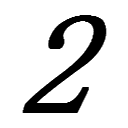

 completo:   4[0.0] 5[0.0] 2[1.0] 7[0.0] 9[0.0] 6[0.0] 8[0.0] 3[0.0] 1[0.0] B[0.0] A[0.0] 0[0.0] E[0.0] F[0.0] D[0.0] C[0.0] G[0.0] K[0.0] I[0.0] J[0.0] H[0.0] M[0.0] N[0.0] L[0.0] O[0.0] Q[0.0] P[0.0] R[0.0] V[0.0] U[0.0] Z[0.0] W[0.0] X[0.0] S[0.0] Y[0.0] T[0.0]



>  gdrive/My Drive/IA/demoConvNet-Letras/Predict/img013-00871.png :  C  [1.] 


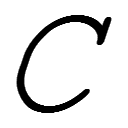

 completo:   4[0.0] 5[0.0] 2[0.0] 7[0.0] 9[0.0] 6[0.0] 8[0.0] 3[0.0] 1[0.0] B[0.0] A[0.0] 0[0.0] E[0.0] F[0.0] D[0.0] C[1.0] G[0.0] K[0.0] I[0.0] J[0.0] H[0.0] M[0.0] N[0.0] L[0.0] O[0.0] Q[0.0] P[0.0] R[0.0] V[0.0] U[0.0] Z[0.0] W[0.0] X[0.0] S[0.0] Y[0.0] T[0.0]



>  gdrive/My Drive/IA/demoConvNet-Letras/Predict/img008-00050.png :  7  [1.] 


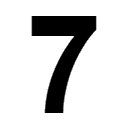

 completo:   4[0.0] 5[0.0] 2[0.0] 7[1.0] 9[0.0] 6[0.0] 8[0.0] 3[0.0] 1[0.0] B[0.0] A[0.0] 0[0.0] E[0.0] F[0.0] D[0.0] C[0.0] G[0.0] K[0.0] I[0.0] J[0.0] H[0.0] M[0.0] N[0.0] L[0.0] O[0.0] Q[0.0] P[0.0] R[0.0] V[0.0] U[0.0] Z[0.0] W[0.0] X[0.0] S[0.0] Y[0.0] T[0.0]



>  gdrive/My Drive/IA/demoConvNet-Letras/Predict/img029-00525.png :  S  [1.] 


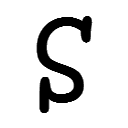

 completo:   4[0.0] 5[0.0] 2[0.0] 7[0.0] 9[0.0] 6[0.0] 8[0.0] 3[0.0] 1[0.0] B[0.0] A[0.0] 0[0.0] E[0.0] F[0.0] D[0.0] C[0.0] G[0.0] K[0.0] I[0.0] J[0.0] H[0.0] M[0.0] N[0.0] L[0.0] O[0.0] Q[0.0] P[0.0] R[0.0] V[0.0] U[0.0] Z[0.0] W[0.0] X[0.0] S[1.0] Y[0.0] T[0.0]



>  gdrive/My Drive/IA/demoConvNet-Letras/Predict/img034-00150.png :  X  [1.] 


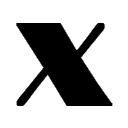

 completo:   4[0.0] 5[0.0] 2[0.0] 7[0.0] 9[0.0] 6[0.0] 8[0.0] 3[0.0] 1[0.0] B[0.0] A[0.0] 0[0.0] E[0.0] F[0.0] D[0.0] C[0.0] G[0.0] K[0.0] I[0.0] J[0.0] H[0.0] M[0.0] N[0.0] L[0.0] O[0.0] Q[0.0] P[0.0] R[0.0] V[0.0] U[0.0] Z[0.0] W[0.0] X[1.0] S[0.0] Y[0.0] T[0.0]



>  gdrive/My Drive/IA/demoConvNet-Letras/Predict/img018-00201.png :  H  [1.] 


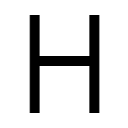

 completo:   4[0.0] 5[0.0] 2[0.0] 7[0.0] 9[0.0] 6[0.0] 8[0.0] 3[0.0] 1[0.0] B[0.0] A[0.0] 0[0.0] E[0.0] F[0.0] D[0.0] C[0.0] G[0.0] K[0.0] I[0.0] J[0.0] H[1.0] M[0.0] N[0.0] L[0.0] O[0.0] Q[0.0] P[0.0] R[0.0] V[0.0] U[0.0] Z[0.0] W[0.0] X[0.0] S[0.0] Y[0.0] T[0.0]



>  gdrive/My Drive/IA/demoConvNet-Letras/Predict/img021-00375.png :  K  [1.] 


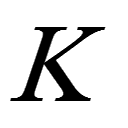

 completo:   4[0.0] 5[0.0] 2[0.0] 7[0.0] 9[0.0] 6[0.0] 8[0.0] 3[0.0] 1[0.0] B[0.0] A[0.0] 0[0.0] E[0.0] F[0.0] D[0.0] C[0.0] G[0.0] K[1.0] I[0.0] J[0.0] H[0.0] M[0.0] N[0.0] L[0.0] O[0.0] Q[0.0] P[0.0] R[0.0] V[0.0] U[0.0] Z[0.0] W[0.0] X[0.0] S[0.0] Y[0.0] T[0.0]



>  gdrive/My Drive/IA/demoConvNet-Letras/Predict/img030-00591.png :  T  [1.] 


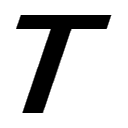

 completo:   4[0.0] 5[0.0] 2[0.0] 7[0.0] 9[0.0] 6[0.0] 8[0.0] 3[0.0] 1[0.0] B[0.0] A[0.0] 0[0.0] E[0.0] F[0.0] D[0.0] C[0.0] G[0.0] K[0.0] I[0.0] J[0.0] H[0.0] M[0.0] N[0.0] L[0.0] O[0.0] Q[0.0] P[0.0] R[0.0] V[0.0] U[0.0] Z[0.0] W[0.0] X[0.0] S[0.0] Y[0.0] T[1.0]



>  gdrive/My Drive/IA/demoConvNet-Letras/Predict/img007-00782.png :  6  [1.] 


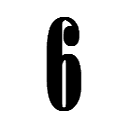

 completo:   4[0.0] 5[0.0] 2[0.0] 7[0.0] 9[0.0] 6[1.0] 8[0.0] 3[0.0] 1[0.0] B[0.0] A[0.0] 0[0.0] E[0.0] F[0.0] D[0.0] C[0.0] G[0.0] K[0.0] I[0.0] J[0.0] H[0.0] M[0.0] N[0.0] L[0.0] O[0.0] Q[0.0] P[0.0] R[0.0] V[0.0] U[0.0] Z[0.0] W[0.0] X[0.0] S[0.0] Y[0.0] T[0.0]



>  gdrive/My Drive/IA/demoConvNet-Letras/Predict/img018-00870.png :  H  [1.] 


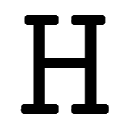

 completo:   4[0.0] 5[0.0] 2[0.0] 7[0.0] 9[0.0] 6[0.0] 8[0.0] 3[0.0] 1[0.0] B[0.0] A[0.0] 0[0.0] E[0.0] F[0.0] D[0.0] C[0.0] G[0.0] K[0.0] I[0.0] J[0.0] H[1.0] M[0.0] N[0.0] L[0.0] O[0.0] Q[0.0] P[0.0] R[0.0] V[0.0] U[0.0] Z[0.0] W[0.0] X[0.0] S[0.0] Y[0.0] T[0.0]



>  gdrive/My Drive/IA/demoConvNet-Letras/Predict/img014-00623.png :  D  [1.] 


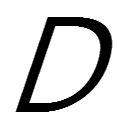

 completo:   4[0.0] 5[0.0] 2[0.0] 7[0.0] 9[0.0] 6[0.0] 8[0.0] 3[0.0] 1[0.0] B[0.0] A[0.0] 0[0.0] E[0.0] F[0.0] D[1.0] C[0.0] G[0.0] K[0.0] I[0.0] J[0.0] H[0.0] M[0.0] N[0.0] L[0.0] O[0.0] Q[0.0] P[0.0] R[0.0] V[0.0] U[0.0] Z[0.0] W[0.0] X[0.0] S[0.0] Y[0.0] T[0.0]



>  gdrive/My Drive/IA/demoConvNet-Letras/Predict/img002-00471.png :  1  [1.] 


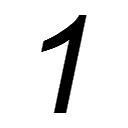

 completo:   4[0.0] 5[0.0] 2[0.0] 7[0.0] 9[0.0] 6[0.0] 8[0.0] 3[0.0] 1[1.0] B[0.0] A[0.0] 0[0.0] E[0.0] F[0.0] D[0.0] C[0.0] G[0.0] K[0.0] I[0.0] J[0.0] H[0.0] M[0.0] N[0.0] L[0.0] O[0.0] Q[0.0] P[0.0] R[0.0] V[0.0] U[0.0] Z[0.0] W[0.0] X[0.0] S[0.0] Y[0.0] T[0.0]



>  gdrive/My Drive/IA/demoConvNet-Letras/Predict/img011-00299.png :  A  [1.] 


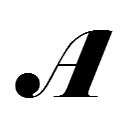

 completo:   4[0.0] 5[0.0] 2[0.0] 7[0.0] 9[0.0] 6[0.0] 8[0.0] 3[0.0] 1[0.0] B[0.0] A[1.0] 0[0.0] E[0.0] F[0.0] D[0.0] C[0.0] G[0.0] K[0.0] I[0.0] J[0.0] H[0.0] M[0.0] N[0.0] L[0.0] O[0.0] Q[0.0] P[0.0] R[0.0] V[0.0] U[0.0] Z[0.0] W[0.0] X[0.0] S[0.0] Y[0.0] T[0.0]



>  gdrive/My Drive/IA/demoConvNet-Letras/Predict/img003-00586.png :  2  [1.] 


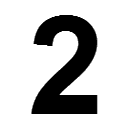

 completo:   4[0.0] 5[0.0] 2[1.0] 7[0.0] 9[0.0] 6[0.0] 8[0.0] 3[0.0] 1[0.0] B[0.0] A[0.0] 0[0.0] E[0.0] F[0.0] D[0.0] C[0.0] G[0.0] K[0.0] I[0.0] J[0.0] H[0.0] M[0.0] N[0.0] L[0.0] O[0.0] Q[0.0] P[0.0] R[0.0] V[0.0] U[0.0] Z[0.0] W[0.0] X[0.0] S[0.0] Y[0.0] T[0.0]



>  gdrive/My Drive/IA/demoConvNet-Letras/Predict/img014-00330.png :  D  [1.] 


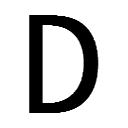

 completo:   4[0.0] 5[0.0] 2[0.0] 7[0.0] 9[0.0] 6[0.0] 8[0.0] 3[0.0] 1[0.0] B[0.0] A[0.0] 0[0.0] E[0.0] F[0.0] D[1.0] C[0.0] G[0.0] K[0.0] I[0.0] J[0.0] H[0.0] M[0.0] N[0.0] L[0.0] O[0.0] Q[0.0] P[0.0] R[0.0] V[0.0] U[0.0] Z[0.0] W[0.0] X[0.0] S[0.0] Y[0.0] T[0.0]



>  gdrive/My Drive/IA/demoConvNet-Letras/Predict/img028-00490.png :  R  [1.] 


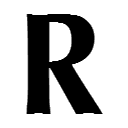

 completo:   4[0.0] 5[0.0] 2[0.0] 7[0.0] 9[0.0] 6[0.0] 8[0.0] 3[0.0] 1[0.0] B[0.0] A[0.0] 0[0.0] E[0.0] F[0.0] D[0.0] C[0.0] G[0.0] K[0.0] I[0.0] J[0.0] H[0.0] M[0.0] N[0.0] L[0.0] O[0.0] Q[0.0] P[0.0] R[1.0] V[0.0] U[0.0] Z[0.0] W[0.0] X[0.0] S[0.0] Y[0.0] T[0.0]



>  gdrive/My Drive/IA/demoConvNet-Letras/Predict/img030-00554.png :  T  [1.] 


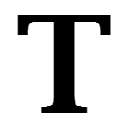

 completo:   4[0.0] 5[0.0] 2[0.0] 7[0.0] 9[0.0] 6[0.0] 8[0.0] 3[0.0] 1[0.0] B[0.0] A[0.0] 0[0.0] E[0.0] F[0.0] D[0.0] C[0.0] G[0.0] K[0.0] I[0.0] J[0.0] H[0.0] M[0.0] N[0.0] L[0.0] O[0.0] Q[0.0] P[0.0] R[0.0] V[0.0] U[0.0] Z[0.0] W[0.0] X[0.0] S[0.0] Y[0.0] T[1.0]



>  gdrive/My Drive/IA/demoConvNet-Letras/Predict/img028-00880.png :  R  [1.] 


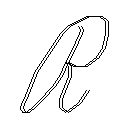

 completo:   4[0.0] 5[0.0] 2[0.0] 7[0.0] 9[0.0] 6[0.0] 8[0.0] 3[0.0] 1[0.0] B[0.0] A[0.0] 0[0.0] E[0.0] F[0.0] D[0.0] C[0.0] G[0.0] K[0.0] I[0.0] J[0.0] H[0.0] M[0.0] N[0.0] L[0.0] O[0.0] Q[0.0] P[0.0] R[1.0] V[0.0] U[0.0] Z[0.0] W[0.0] X[0.0] S[0.0] Y[0.0] T[0.0]



>  gdrive/My Drive/IA/demoConvNet-Letras/Predict/img003-00058.png :  2  [1.] 


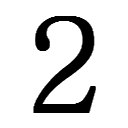

 completo:   4[0.0] 5[0.0] 2[1.0] 7[0.0] 9[0.0] 6[0.0] 8[0.0] 3[0.0] 1[0.0] B[0.0] A[0.0] 0[0.0] E[0.0] F[0.0] D[0.0] C[0.0] G[0.0] K[0.0] I[0.0] J[0.0] H[0.0] M[0.0] N[0.0] L[0.0] O[0.0] Q[0.0] P[0.0] R[0.0] V[0.0] U[0.0] Z[0.0] W[0.0] X[0.0] S[0.0] Y[0.0] T[0.0]



>  gdrive/My Drive/IA/demoConvNet-Letras/Predict/img024-00077.png :  N  [1.] 


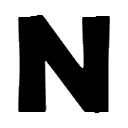

 completo:   4[0.0] 5[0.0] 2[0.0] 7[0.0] 9[0.0] 6[0.0] 8[0.0] 3[0.0] 1[0.0] B[0.0] A[0.0] 0[0.0] E[0.0] F[0.0] D[0.0] C[0.0] G[0.0] K[0.0] I[0.0] J[0.0] H[0.0] M[0.0] N[1.0] L[0.0] O[0.0] Q[0.0] P[0.0] R[0.0] V[0.0] U[0.0] Z[0.0] W[0.0] X[0.0] S[0.0] Y[0.0] T[0.0]



>  gdrive/My Drive/IA/demoConvNet-Letras/Predict/img006-00173.png :  5  [1.] 


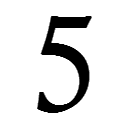

 completo:   4[0.0] 5[1.0] 2[0.0] 7[0.0] 9[0.0] 6[0.0] 8[0.0] 3[0.0] 1[0.0] B[0.0] A[0.0] 0[0.0] E[0.0] F[0.0] D[0.0] C[0.0] G[0.0] K[0.0] I[0.0] J[0.0] H[0.0] M[0.0] N[0.0] L[0.0] O[0.0] Q[0.0] P[0.0] R[0.0] V[0.0] U[0.0] Z[0.0] W[0.0] X[0.0] S[0.0] Y[0.0] T[0.0]



>  gdrive/My Drive/IA/demoConvNet-Letras/Predict/img030-00936.png :  T  [1.] 


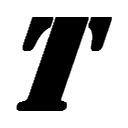

 completo:   4[0.0] 5[0.0] 2[0.0] 7[0.0] 9[0.0] 6[0.0] 8[0.0] 3[0.0] 1[0.0] B[0.0] A[0.0] 0[0.0] E[0.0] F[0.0] D[0.0] C[0.0] G[0.0] K[0.0] I[0.0] J[0.0] H[0.0] M[0.0] N[0.0] L[0.0] O[0.0] Q[0.0] P[0.0] R[0.0] V[0.0] U[0.0] Z[0.0] W[0.0] X[0.0] S[0.0] Y[0.0] T[1.0]



>  gdrive/My Drive/IA/demoConvNet-Letras/Predict/img015-00895.png :  E  [1.] 


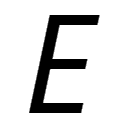

 completo:   4[0.0] 5[0.0] 2[0.0] 7[0.0] 9[0.0] 6[0.0] 8[0.0] 3[0.0] 1[0.0] B[0.0] A[0.0] 0[0.0] E[1.0] F[0.0] D[0.0] C[0.0] G[0.0] K[0.0] I[0.0] J[0.0] H[0.0] M[0.0] N[0.0] L[0.0] O[0.0] Q[0.0] P[0.0] R[0.0] V[0.0] U[0.0] Z[0.0] W[0.0] X[0.0] S[0.0] Y[0.0] T[0.0]



>  gdrive/My Drive/IA/demoConvNet-Letras/Predict/img015-00271.png :  E  [1.] 


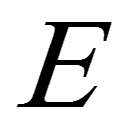

 completo:   4[0.0] 5[0.0] 2[0.0] 7[0.0] 9[0.0] 6[0.0] 8[0.0] 3[0.0] 1[0.0] B[0.0] A[0.0] 0[0.0] E[1.0] F[0.0] D[0.0] C[0.0] G[0.0] K[0.0] I[0.0] J[0.0] H[0.0] M[0.0] N[0.0] L[0.0] O[0.0] Q[0.0] P[0.0] R[0.0] V[0.0] U[0.0] Z[0.0] W[0.0] X[0.0] S[0.0] Y[0.0] T[0.0]



>  gdrive/My Drive/IA/demoConvNet-Letras/Predict/img001-00623.png :  0  [1.] 


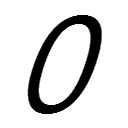

 completo:   4[0.0] 5[0.0] 2[0.0] 7[0.0] 9[0.0] 6[0.0] 8[0.0] 3[0.0] 1[0.0] B[0.0] A[0.0] 0[1.0] E[0.0] F[0.0] D[0.0] C[0.0] G[0.0] K[0.0] I[0.0] J[0.0] H[0.0] M[0.0] N[0.0] L[0.0] O[0.0] Q[0.0] P[0.0] R[0.0] V[0.0] U[0.0] Z[0.0] W[0.0] X[0.0] S[0.0] Y[0.0] T[0.0]



>  gdrive/My Drive/IA/demoConvNet-Letras/Predict/img027-00304.png :  Q  [1.] 


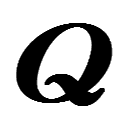

 completo:   4[0.0] 5[0.0] 2[0.0] 7[0.0] 9[0.0] 6[0.0] 8[0.0] 3[0.0] 1[0.0] B[0.0] A[0.0] 0[0.0] E[0.0] F[0.0] D[0.0] C[0.0] G[0.0] K[0.0] I[0.0] J[0.0] H[0.0] M[0.0] N[0.0] L[0.0] O[0.0] Q[1.0] P[0.0] R[0.0] V[0.0] U[0.0] Z[0.0] W[0.0] X[0.0] S[0.0] Y[0.0] T[0.0]



>  gdrive/My Drive/IA/demoConvNet-Letras/Predict/img034-00232.png :  X  [1.] 


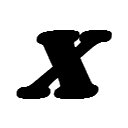

 completo:   4[0.0] 5[0.0] 2[0.0] 7[0.0] 9[0.0] 6[0.0] 8[0.0] 3[0.0] 1[0.0] B[0.0] A[0.0] 0[0.0] E[0.0] F[0.0] D[0.0] C[0.0] G[0.0] K[0.0] I[0.0] J[0.0] H[0.0] M[0.0] N[0.0] L[0.0] O[0.0] Q[0.0] P[0.0] R[0.0] V[0.0] U[0.0] Z[0.0] W[0.0] X[1.0] S[0.0] Y[0.0] T[0.0]



>  gdrive/My Drive/IA/demoConvNet-Letras/Predict/img022-00277.png :  L  [1.] 


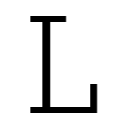

 completo:   4[0.0] 5[0.0] 2[0.0] 7[0.0] 9[0.0] 6[0.0] 8[0.0] 3[0.0] 1[0.0] B[0.0] A[0.0] 0[0.0] E[0.0] F[0.0] D[0.0] C[0.0] G[0.0] K[0.0] I[0.0] J[0.0] H[0.0] M[0.0] N[0.0] L[1.0] O[0.0] Q[0.0] P[0.0] R[0.0] V[0.0] U[0.0] Z[0.0] W[0.0] X[0.0] S[0.0] Y[0.0] T[0.0]



>  gdrive/My Drive/IA/demoConvNet-Letras/Predict/img023-00961.png :  M  [1.] 


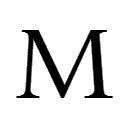

 completo:   4[0.0] 5[0.0] 2[0.0] 7[0.0] 9[0.0] 6[0.0] 8[0.0] 3[0.0] 1[0.0] B[0.0] A[0.0] 0[0.0] E[0.0] F[0.0] D[0.0] C[0.0] G[0.0] K[0.0] I[0.0] J[0.0] H[0.0] M[1.0] N[0.0] L[0.0] O[0.0] Q[0.0] P[0.0] R[0.0] V[0.0] U[0.0] Z[0.0] W[0.0] X[0.0] S[0.0] Y[0.0] T[0.0]



>  gdrive/My Drive/IA/demoConvNet-Letras/Predict/img004-00066.png :  3  [1.] 


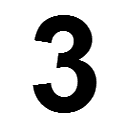

 completo:   4[0.0] 5[0.0] 2[0.0] 7[0.0] 9[0.0] 6[0.0] 8[0.0] 3[1.0] 1[0.0] B[0.0] A[0.0] 0[0.0] E[0.0] F[0.0] D[0.0] C[0.0] G[0.0] K[0.0] I[0.0] J[0.0] H[0.0] M[0.0] N[0.0] L[0.0] O[0.0] Q[0.0] P[0.0] R[0.0] V[0.0] U[0.0] Z[0.0] W[0.0] X[0.0] S[0.0] Y[0.0] T[0.0]



>  gdrive/My Drive/IA/demoConvNet-Letras/Predict/img032-00129.png :  V  [1.] 


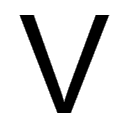

 completo:   4[0.0] 5[0.0] 2[0.0] 7[0.0] 9[0.0] 6[0.0] 8[0.0] 3[0.0] 1[0.0] B[0.0] A[0.0] 0[0.0] E[0.0] F[0.0] D[0.0] C[0.0] G[0.0] K[0.0] I[0.0] J[0.0] H[0.0] M[0.0] N[0.0] L[0.0] O[0.0] Q[0.0] P[0.0] R[0.0] V[1.0] U[0.0] Z[0.0] W[0.0] X[0.0] S[0.0] Y[0.0] T[0.0]



>  gdrive/My Drive/IA/demoConvNet-Letras/Predict/img031-00403.png :  U  [1.] 


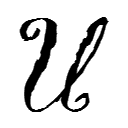

 completo:   4[0.0] 5[0.0] 2[0.0] 7[0.0] 9[0.0] 6[0.0] 8[0.0] 3[0.0] 1[0.0] B[0.0] A[0.0] 0[0.0] E[0.0] F[0.0] D[0.0] C[0.0] G[0.0] K[0.0] I[0.0] J[0.0] H[0.0] M[0.0] N[0.0] L[0.0] O[0.0] Q[0.0] P[0.0] R[0.0] V[0.0] U[1.0] Z[0.0] W[0.0] X[0.0] S[0.0] Y[0.0] T[0.0]



>  gdrive/My Drive/IA/demoConvNet-Letras/Predict/img003-00807.png :  2  [1.] 


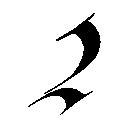

 completo:   4[0.0] 5[0.0] 2[1.0] 7[0.0] 9[0.0] 6[0.0] 8[0.0] 3[0.0] 1[0.0] B[0.0] A[0.0] 0[0.0] E[0.0] F[0.0] D[0.0] C[0.0] G[0.0] K[0.0] I[0.0] J[0.0] H[0.0] M[0.0] N[0.0] L[0.0] O[0.0] Q[0.0] P[0.0] R[0.0] V[0.0] U[0.0] Z[0.0] W[0.0] X[0.0] S[0.0] Y[0.0] T[0.0]



>  gdrive/My Drive/IA/demoConvNet-Letras/Predict/img032-00718.png :  V  [1.] 


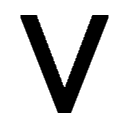

 completo:   4[0.0] 5[0.0] 2[0.0] 7[0.0] 9[0.0] 6[0.0] 8[0.0] 3[0.0] 1[0.0] B[0.0] A[0.0] 0[0.0] E[0.0] F[0.0] D[0.0] C[0.0] G[0.0] K[0.0] I[0.0] J[0.0] H[0.0] M[0.0] N[0.0] L[0.0] O[0.0] Q[0.0] P[0.0] R[0.0] V[1.0] U[0.0] Z[0.0] W[0.0] X[0.0] S[0.0] Y[0.0] T[0.0]



>  gdrive/My Drive/IA/demoConvNet-Letras/Predict/img004-00168.png :  3  [1.] 


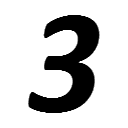

 completo:   4[0.0] 5[0.0] 2[0.0] 7[0.0] 9[0.0] 6[0.0] 8[0.0] 3[1.0] 1[0.0] B[0.0] A[0.0] 0[0.0] E[0.0] F[0.0] D[0.0] C[0.0] G[0.0] K[0.0] I[0.0] J[0.0] H[0.0] M[0.0] N[0.0] L[0.0] O[0.0] Q[0.0] P[0.0] R[0.0] V[0.0] U[0.0] Z[0.0] W[0.0] X[0.0] S[0.0] Y[0.0] T[0.0]



>  gdrive/My Drive/IA/demoConvNet-Letras/Predict/img016-00694.png :  F  [1.] 


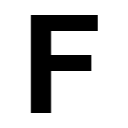

 completo:   4[0.0] 5[0.0] 2[0.0] 7[0.0] 9[0.0] 6[0.0] 8[0.0] 3[0.0] 1[0.0] B[0.0] A[0.0] 0[0.0] E[0.0] F[1.0] D[0.0] C[0.0] G[0.0] K[0.0] I[0.0] J[0.0] H[0.0] M[0.0] N[0.0] L[0.0] O[0.0] Q[0.0] P[0.0] R[0.0] V[0.0] U[0.0] Z[0.0] W[0.0] X[0.0] S[0.0] Y[0.0] T[0.0]



>  gdrive/My Drive/IA/demoConvNet-Letras/Predict/img021-00003.png :  K  [1.] 


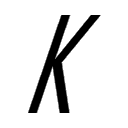

 completo:   4[0.0] 5[0.0] 2[0.0] 7[0.0] 9[0.0] 6[0.0] 8[0.0] 3[0.0] 1[0.0] B[0.0] A[0.0] 0[0.0] E[0.0] F[0.0] D[0.0] C[0.0] G[0.0] K[1.0] I[0.0] J[0.0] H[0.0] M[0.0] N[0.0] L[0.0] O[0.0] Q[0.0] P[0.0] R[0.0] V[0.0] U[0.0] Z[0.0] W[0.0] X[0.0] S[0.0] Y[0.0] T[0.0]



>  gdrive/My Drive/IA/demoConvNet-Letras/Predict/img002-00864.png :  1  [1.] 


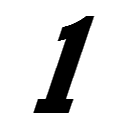

 completo:   4[0.0] 5[0.0] 2[0.0] 7[0.0] 9[0.0] 6[0.0] 8[0.0] 3[0.0] 1[1.0] B[0.0] A[0.0] 0[0.0] E[0.0] F[0.0] D[0.0] C[0.0] G[0.0] K[0.0] I[0.0] J[0.0] H[0.0] M[0.0] N[0.0] L[0.0] O[0.0] Q[0.0] P[0.0] R[0.0] V[0.0] U[0.0] Z[0.0] W[0.0] X[0.0] S[0.0] Y[0.0] T[0.0]



>  gdrive/My Drive/IA/demoConvNet-Letras/Predict/img021-00080.png :  K  [1.] 


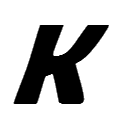

 completo:   4[0.0] 5[0.0] 2[0.0] 7[0.0] 9[0.0] 6[0.0] 8[0.0] 3[0.0] 1[0.0] B[0.0] A[0.0] 0[0.0] E[0.0] F[0.0] D[0.0] C[0.0] G[0.0] K[1.0] I[0.0] J[0.0] H[0.0] M[0.0] N[0.0] L[0.0] O[0.0] Q[0.0] P[0.0] R[0.0] V[0.0] U[0.0] Z[0.0] W[0.0] X[0.0] S[0.0] Y[0.0] T[0.0]



>  gdrive/My Drive/IA/demoConvNet-Letras/Predict/img005-00233.png :  4  [1.] 


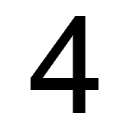

 completo:   4[1.0] 5[0.0] 2[0.0] 7[0.0] 9[0.0] 6[0.0] 8[0.0] 3[0.0] 1[0.0] B[0.0] A[0.0] 0[0.0] E[0.0] F[0.0] D[0.0] C[0.0] G[0.0] K[0.0] I[0.0] J[0.0] H[0.0] M[0.0] N[0.0] L[0.0] O[0.0] Q[0.0] P[0.0] R[0.0] V[0.0] U[0.0] Z[0.0] W[0.0] X[0.0] S[0.0] Y[0.0] T[0.0]



>  gdrive/My Drive/IA/demoConvNet-Letras/Predict/img019-00220.png :  I  [1.] 


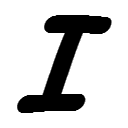

 completo:   4[0.0] 5[0.0] 2[0.0] 7[0.0] 9[0.0] 6[0.0] 8[0.0] 3[0.0] 1[0.0] B[0.0] A[0.0] 0[0.0] E[0.0] F[0.0] D[0.0] C[0.0] G[0.0] K[0.0] I[1.0] J[0.0] H[0.0] M[0.0] N[0.0] L[0.0] O[0.0] Q[0.0] P[0.0] R[0.0] V[0.0] U[0.0] Z[0.0] W[0.0] X[0.0] S[0.0] Y[0.0] T[0.0]



>  gdrive/My Drive/IA/demoConvNet-Letras/Predict/img009-00626.png :  8  [1.] 


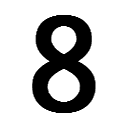

 completo:   4[0.0] 5[0.0] 2[0.0] 7[0.0] 9[0.0] 6[0.0] 8[1.0] 3[0.0] 1[0.0] B[0.0] A[0.0] 0[0.0] E[0.0] F[0.0] D[0.0] C[0.0] G[0.0] K[0.0] I[0.0] J[0.0] H[0.0] M[0.0] N[0.0] L[0.0] O[0.0] Q[0.0] P[0.0] R[0.0] V[0.0] U[0.0] Z[0.0] W[0.0] X[0.0] S[0.0] Y[0.0] T[0.0]



>  gdrive/My Drive/IA/demoConvNet-Letras/Predict/img033-00962.png :  W  [1.] 


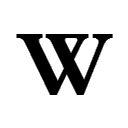

 completo:   4[0.0] 5[0.0] 2[0.0] 7[0.0] 9[0.0] 6[0.0] 8[0.0] 3[0.0] 1[0.0] B[0.0] A[0.0] 0[0.0] E[0.0] F[0.0] D[0.0] C[0.0] G[0.0] K[0.0] I[0.0] J[0.0] H[0.0] M[0.0] N[0.0] L[0.0] O[0.0] Q[0.0] P[0.0] R[0.0] V[0.0] U[0.0] Z[0.0] W[1.0] X[0.0] S[0.0] Y[0.0] T[0.0]



>  gdrive/My Drive/IA/demoConvNet-Letras/Predict/img011-00930.png :  A  [1.] 


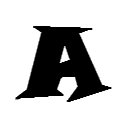

 completo:   4[0.0] 5[0.0] 2[0.0] 7[0.0] 9[0.0] 6[0.0] 8[0.0] 3[0.0] 1[0.0] B[0.0] A[1.0] 0[0.0] E[0.0] F[0.0] D[0.0] C[0.0] G[0.0] K[0.0] I[0.0] J[0.0] H[0.0] M[0.0] N[0.0] L[0.0] O[0.0] Q[0.0] P[0.0] R[0.0] V[0.0] U[0.0] Z[0.0] W[0.0] X[0.0] S[0.0] Y[0.0] T[0.0]



>  gdrive/My Drive/IA/demoConvNet-Letras/Predict/img013-01002.png :  C  [1.] 


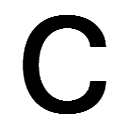

 completo:   4[0.0] 5[0.0] 2[0.0] 7[0.0] 9[0.0] 6[0.0] 8[0.0] 3[0.0] 1[0.0] B[0.0] A[0.0] 0[0.0] E[0.0] F[0.0] D[0.0] C[1.0] G[0.0] K[0.0] I[0.0] J[0.0] H[0.0] M[0.0] N[0.0] L[0.0] O[0.0] Q[0.0] P[0.0] R[0.0] V[0.0] U[0.0] Z[0.0] W[0.0] X[0.0] S[0.0] Y[0.0] T[0.0]



>  gdrive/My Drive/IA/demoConvNet-Letras/Predict/img028-00384.png :  R  [1.] 


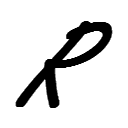

 completo:   4[0.0] 5[0.0] 2[0.0] 7[0.0] 9[0.0] 6[0.0] 8[0.0] 3[0.0] 1[0.0] B[0.0] A[0.0] 0[0.0] E[0.0] F[0.0] D[0.0] C[0.0] G[0.0] K[0.0] I[0.0] J[0.0] H[0.0] M[0.0] N[0.0] L[0.0] O[0.0] Q[0.0] P[0.0] R[1.0] V[0.0] U[0.0] Z[0.0] W[0.0] X[0.0] S[0.0] Y[0.0] T[0.0]



>  gdrive/My Drive/IA/demoConvNet-Letras/Predict/img015-00957.png :  E  [1.] 


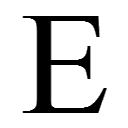

 completo:   4[0.0] 5[0.0] 2[0.0] 7[0.0] 9[0.0] 6[0.0] 8[0.0] 3[0.0] 1[0.0] B[0.0] A[0.0] 0[0.0] E[1.0] F[0.0] D[0.0] C[0.0] G[0.0] K[0.0] I[0.0] J[0.0] H[0.0] M[0.0] N[0.0] L[0.0] O[0.0] Q[0.0] P[0.0] R[0.0] V[0.0] U[0.0] Z[0.0] W[0.0] X[0.0] S[0.0] Y[0.0] T[0.0]



>  gdrive/My Drive/IA/demoConvNet-Letras/Predict/img011-00553.png :  A  [1.] 


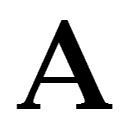

 completo:   4[0.0] 5[0.0] 2[0.0] 7[0.0] 9[0.0] 6[0.0] 8[0.0] 3[0.0] 1[0.0] B[0.0] A[1.0] 0[0.0] E[0.0] F[0.0] D[0.0] C[0.0] G[0.0] K[0.0] I[0.0] J[0.0] H[0.0] M[0.0] N[0.0] L[0.0] O[0.0] Q[0.0] P[0.0] R[0.0] V[0.0] U[0.0] Z[0.0] W[0.0] X[0.0] S[0.0] Y[0.0] T[0.0]



>  gdrive/My Drive/IA/demoConvNet-Letras/Predict/img026-00064.png :  P  [1.] 


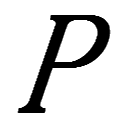

 completo:   4[0.0] 5[0.0] 2[0.0] 7[0.0] 9[0.0] 6[0.0] 8[0.0] 3[0.0] 1[0.0] B[0.0] A[0.0] 0[0.0] E[0.0] F[0.0] D[0.0] C[0.0] G[0.0] K[0.0] I[0.0] J[0.0] H[0.0] M[0.0] N[0.0] L[0.0] O[0.0] Q[0.0] P[1.0] R[0.0] V[0.0] U[0.0] Z[0.0] W[0.0] X[0.0] S[0.0] Y[0.0] T[0.0]



>  gdrive/My Drive/IA/demoConvNet-Letras/Predict/img028-00280.png :  R  [1.] 


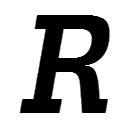

 completo:   4[0.0] 5[0.0] 2[0.0] 7[0.0] 9[0.0] 6[0.0] 8[0.0] 3[0.0] 1[0.0] B[0.0] A[0.0] 0[0.0] E[0.0] F[0.0] D[0.0] C[0.0] G[0.0] K[0.0] I[0.0] J[0.0] H[0.0] M[0.0] N[0.0] L[0.0] O[0.0] Q[0.0] P[0.0] R[1.0] V[0.0] U[0.0] Z[0.0] W[0.0] X[0.0] S[0.0] Y[0.0] T[0.0]



>  gdrive/My Drive/IA/demoConvNet-Letras/Predict/img017-00724.png :  G  [1.] 


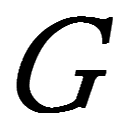

 completo:   4[0.0] 5[0.0] 2[0.0] 7[0.0] 9[0.0] 6[0.0] 8[0.0] 3[0.0] 1[0.0] B[0.0] A[0.0] 0[0.0] E[0.0] F[0.0] D[0.0] C[0.0] G[1.0] K[0.0] I[0.0] J[0.0] H[0.0] M[0.0] N[0.0] L[0.0] O[0.0] Q[0.0] P[0.0] R[0.0] V[0.0] U[0.0] Z[0.0] W[0.0] X[0.0] S[0.0] Y[0.0] T[0.0]



>  gdrive/My Drive/IA/demoConvNet-Letras/Predict/img015-00183.png :  E  [1.] 


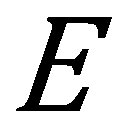

 completo:   4[0.0] 5[0.0] 2[0.0] 7[0.0] 9[0.0] 6[0.0] 8[0.0] 3[0.0] 1[0.0] B[0.0] A[0.0] 0[0.0] E[1.0] F[0.0] D[0.0] C[0.0] G[0.0] K[0.0] I[0.0] J[0.0] H[0.0] M[0.0] N[0.0] L[0.0] O[0.0] Q[0.0] P[0.0] R[0.0] V[0.0] U[0.0] Z[0.0] W[0.0] X[0.0] S[0.0] Y[0.0] T[0.0]



>  gdrive/My Drive/IA/demoConvNet-Letras/Predict/img013-00256.png :  C  [1.] 


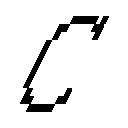

 completo:   4[0.0] 5[0.0] 2[0.0] 7[0.0] 9[0.0] 6[0.0] 8[0.0] 3[0.0] 1[0.0] B[0.0] A[0.0] 0[0.0] E[0.0] F[0.0] D[0.0] C[1.0] G[0.0] K[0.0] I[0.0] J[0.0] H[0.0] M[0.0] N[0.0] L[0.0] O[0.0] Q[0.0] P[0.0] R[0.0] V[0.0] U[0.0] Z[0.0] W[0.0] X[0.0] S[0.0] Y[0.0] T[0.0]



>  gdrive/My Drive/IA/demoConvNet-Letras/Predict/img016-00340.png :  F  [1.] 


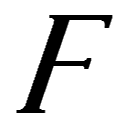

 completo:   4[0.0] 5[0.0] 2[0.0] 7[0.0] 9[0.0] 6[0.0] 8[0.0] 3[0.0] 1[0.0] B[0.0] A[0.0] 0[0.0] E[0.0] F[1.0] D[0.0] C[0.0] G[0.0] K[0.0] I[0.0] J[0.0] H[0.0] M[0.0] N[0.0] L[0.0] O[0.0] Q[0.0] P[0.0] R[0.0] V[0.0] U[0.0] Z[0.0] W[0.0] X[0.0] S[0.0] Y[0.0] T[0.0]



>  gdrive/My Drive/IA/demoConvNet-Letras/Predict/img005-00012.png :  4  [1.] 


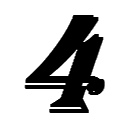

 completo:   4[1.0] 5[0.0] 2[0.0] 7[0.0] 9[0.0] 6[0.0] 8[0.0] 3[0.0] 1[0.0] B[0.0] A[0.0] 0[0.0] E[0.0] F[0.0] D[0.0] C[0.0] G[0.0] K[0.0] I[0.0] J[0.0] H[0.0] M[0.0] N[0.0] L[0.0] O[0.0] Q[0.0] P[0.0] R[0.0] V[0.0] U[0.0] Z[0.0] W[0.0] X[0.0] S[0.0] Y[0.0] T[0.0]



>  gdrive/My Drive/IA/demoConvNet-Letras/Predict/img004-00495.png :  3  [1.] 


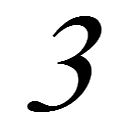

 completo:   4[0.0] 5[0.0] 2[0.0] 7[0.0] 9[0.0] 6[0.0] 8[0.0] 3[1.0] 1[0.0] B[0.0] A[0.0] 0[0.0] E[0.0] F[0.0] D[0.0] C[0.0] G[0.0] K[0.0] I[0.0] J[0.0] H[0.0] M[0.0] N[0.0] L[0.0] O[0.0] Q[0.0] P[0.0] R[0.0] V[0.0] U[0.0] Z[0.0] W[0.0] X[0.0] S[0.0] Y[0.0] T[0.0]



>  gdrive/My Drive/IA/demoConvNet-Letras/Predict/img021-00855.png :  K  [1.] 


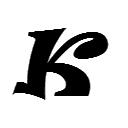

 completo:   4[0.0] 5[0.0] 2[0.0] 7[0.0] 9[0.0] 6[0.0] 8[0.0] 3[0.0] 1[0.0] B[0.0] A[0.0] 0[0.0] E[0.0] F[0.0] D[0.0] C[0.0] G[0.0] K[1.0] I[0.0] J[0.0] H[0.0] M[0.0] N[0.0] L[0.0] O[0.0] Q[0.0] P[0.0] R[0.0] V[0.0] U[0.0] Z[0.0] W[0.0] X[0.0] S[0.0] Y[0.0] T[0.0]



>  gdrive/My Drive/IA/demoConvNet-Letras/Predict/img028-00569.png :  R  [1.] 


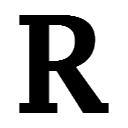

 completo:   4[0.0] 5[0.0] 2[0.0] 7[0.0] 9[0.0] 6[0.0] 8[0.0] 3[0.0] 1[0.0] B[0.0] A[0.0] 0[0.0] E[0.0] F[0.0] D[0.0] C[0.0] G[0.0] K[0.0] I[0.0] J[0.0] H[0.0] M[0.0] N[0.0] L[0.0] O[0.0] Q[0.0] P[0.0] R[1.0] V[0.0] U[0.0] Z[0.0] W[0.0] X[0.0] S[0.0] Y[0.0] T[0.0]



>  gdrive/My Drive/IA/demoConvNet-Letras/Predict/img014-00901.png :  D  [1.] 


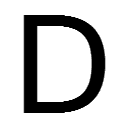

 completo:   4[0.0] 5[0.0] 2[0.0] 7[0.0] 9[0.0] 6[0.0] 8[0.0] 3[0.0] 1[0.0] B[0.0] A[0.0] 0[0.0] E[0.0] F[0.0] D[1.0] C[0.0] G[0.0] K[0.0] I[0.0] J[0.0] H[0.0] M[0.0] N[0.0] L[0.0] O[0.0] Q[0.0] P[0.0] R[0.0] V[0.0] U[0.0] Z[0.0] W[0.0] X[0.0] S[0.0] Y[0.0] T[0.0]



>  gdrive/My Drive/IA/demoConvNet-Letras/Predict/img016-00680.png :  F  [1.] 


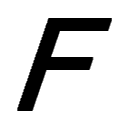

 completo:   4[0.0] 5[0.0] 2[0.0] 7[0.0] 9[0.0] 6[0.0] 8[0.0] 3[0.0] 1[0.0] B[0.0] A[0.0] 0[0.0] E[0.0] F[1.0] D[0.0] C[0.0] G[0.0] K[0.0] I[0.0] J[0.0] H[0.0] M[0.0] N[0.0] L[0.0] O[0.0] Q[0.0] P[0.0] R[0.0] V[0.0] U[0.0] Z[0.0] W[0.0] X[0.0] S[0.0] Y[0.0] T[0.0]



>  gdrive/My Drive/IA/demoConvNet-Letras/Predict/img028-00058.png :  R  [1.] 


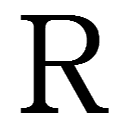

 completo:   4[0.0] 5[0.0] 2[0.0] 7[0.0] 9[0.0] 6[0.0] 8[0.0] 3[0.0] 1[0.0] B[0.0] A[0.0] 0[0.0] E[0.0] F[0.0] D[0.0] C[0.0] G[0.0] K[0.0] I[0.0] J[0.0] H[0.0] M[0.0] N[0.0] L[0.0] O[0.0] Q[0.0] P[0.0] R[1.0] V[0.0] U[0.0] Z[0.0] W[0.0] X[0.0] S[0.0] Y[0.0] T[0.0]



>  gdrive/My Drive/IA/demoConvNet-Letras/Predict/img033-00135.png :  W  [1.] 


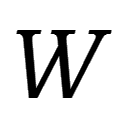

 completo:   4[0.0] 5[0.0] 2[0.0] 7[0.0] 9[0.0] 6[0.0] 8[0.0] 3[0.0] 1[0.0] B[0.0] A[0.0] 0[0.0] E[0.0] F[0.0] D[0.0] C[0.0] G[0.0] K[0.0] I[0.0] J[0.0] H[0.0] M[0.0] N[0.0] L[0.0] O[0.0] Q[0.0] P[0.0] R[0.0] V[0.0] U[0.0] Z[0.0] W[1.0] X[0.0] S[0.0] Y[0.0] T[0.0]



>  gdrive/My Drive/IA/demoConvNet-Letras/Predict/img036-00521.png :  Z  [1.] 


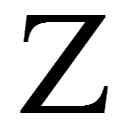

 completo:   4[0.0] 5[0.0] 2[0.0] 7[0.0] 9[0.0] 6[0.0] 8[0.0] 3[0.0] 1[0.0] B[0.0] A[0.0] 0[0.0] E[0.0] F[0.0] D[0.0] C[0.0] G[0.0] K[0.0] I[0.0] J[0.0] H[0.0] M[0.0] N[0.0] L[0.0] O[0.0] Q[0.0] P[0.0] R[0.0] V[0.0] U[0.0] Z[1.0] W[0.0] X[0.0] S[0.0] Y[0.0] T[0.0]



>  gdrive/My Drive/IA/demoConvNet-Letras/Predict/img027-00360.png :  Q  [1.] 


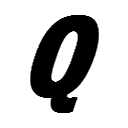

 completo:   4[0.0] 5[0.0] 2[0.0] 7[0.0] 9[0.0] 6[0.0] 8[0.0] 3[0.0] 1[0.0] B[0.0] A[0.0] 0[0.0] E[0.0] F[0.0] D[0.0] C[0.0] G[0.0] K[0.0] I[0.0] J[0.0] H[0.0] M[0.0] N[0.0] L[0.0] O[0.0] Q[1.0] P[0.0] R[0.0] V[0.0] U[0.0] Z[0.0] W[0.0] X[0.0] S[0.0] Y[0.0] T[0.0]



>  gdrive/My Drive/IA/demoConvNet-Letras/Predict/img003-00422.png :  2  [1.] 


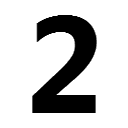

 completo:   4[0.0] 5[0.0] 2[1.0] 7[0.0] 9[0.0] 6[0.0] 8[0.0] 3[0.0] 1[0.0] B[0.0] A[0.0] 0[0.0] E[0.0] F[0.0] D[0.0] C[0.0] G[0.0] K[0.0] I[0.0] J[0.0] H[0.0] M[0.0] N[0.0] L[0.0] O[0.0] Q[0.0] P[0.0] R[0.0] V[0.0] U[0.0] Z[0.0] W[0.0] X[0.0] S[0.0] Y[0.0] T[0.0]




In [4]:
# define función auxiliar para mostrar resultado
def predict(file_name, image_sample):
    result = classifier.predict(image_sample)
    
    # identifica mejor
    bestPos = np.argmax(result, axis=1)

    # muestra resultados
    print("\n> ", file_name,": ",  all_classes[int(bestPos)], "", result[0][bestPos], "" )
    resCompleto = ""
    for pred, clpred in zip(result[0], all_classes):
        resCompleto = "".join([resCompleto, " ", str(clpred), "[", str(pred),"]"])
  
    img = Image(file_name, width = "120", height = "80")  
    display(img)

    print(" completo: ", resCompleto)
    print("\n")

# procesa las imágenes de la carpeta <Predict>
predict_path = "".join([path, '/Predict'])
for file in os.listdir(predict_path):
    if not file.startswith('.'):
        file = predict_path + "/" + file

        image_sample = image.load_img(file, target_size = (128, 128))
        image_sample = image.img_to_array(image_sample)
        image_sample = np.expand_dims(image_sample, axis = 0)
        
        predict(file, image_sample)